# Gathering of Bayesian evidence for the ELM model

In [1]:
import pickle
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from periodictable import elements
import pickle

In [2]:
import elm

Using database version x4i3_X4-2023-04-29 located in: /home/beyerk/mambaforge/envs/sage/lib/python3.11/site-packages/x4i3/data


In [3]:
import exfor_tools
import jitr

In [4]:
# plotting
kd_color = "#bc5090"
qelm_color = "#f28d3d"
elm_color = "#4277c0"

In [5]:
proton = (1, 1)
neutron = (1, 0)

In [7]:
import json

param_file = Path("/home/beyerk/Projects/jitr/src/data/KD_default.json")
kduq_omp_neutron = jitr.reactions.kduq.KDGlobal(neutron, param_file)
kduq_omp_proton = jitr.reactions.kduq.KDGlobal(proton, param_file)

In [8]:
with open("./corpus_elastic.pkl", "rb") as f:
    workspaces = pickle.load(f)

In [9]:
target = (116, 50)
A,Z = target
projectile = proton

In [10]:
ws = workspaces[proton][target]

In [11]:
omp = kduq_omp_neutron if projectile == neutron else kduq_omp_proton

In [12]:
len(ws)

6

(-20.0, 185.0)

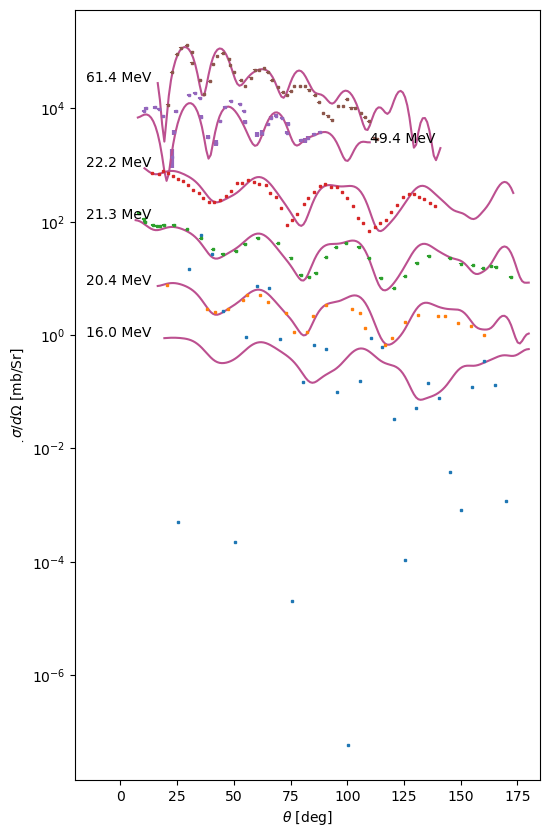

In [21]:
fig, ax = plt.subplots(figsize=(6, 10))
for i in range(6):
    offset = 10 ** (i)
    
    coulomb_params, central_params, spin_orbit_params = omp.get_params(
        *ws[i].calibration_model.target,
        ws[i].calibration_model.mu,
        ws[i].exp.Elab,
        ws[i].calibration_model.k,
    )
    xs_sample = ws[i].visualization_model.xs(
        jitr.reactions.kduq.KD_central_plus_coulomb,
        jitr.reactions.kduq.KD_spin_orbit,
        (central_params, coulomb_params),
        spin_orbit_params,
    )
    x, dx, y, dy = ws[i].exp.data
    
    plt.errorbar(
        x,
        y * offset,
        yerr=dy *offset,
        linestyle="none",
        elinewidth=3,
        marker="s",
        markersize=2,
     #   color='k'
    )

    xth = ws[i].angles_vis * 180 / np.pi
    yth = xs_sample.dsdo  / xs_sample.rutherford
    mask = np.logical_and(xth >= x[0]*0.75, xth <= x[-1] * 1.25 )
    
    plt.plot( xth[mask], yth[mask] * offset, color=kd_color)
    
    if x[-1] < 25:
        xloc = 35
        yloc = yth[mask][-1]
    
    elif x[-1] < 35:
        xloc = 45
        yloc = yth[mask][-1]

    elif x[-1] < 50:
        xloc = 60
        yloc = yth[mask][-1]
    elif x[-1] < 100:
        xloc = 110
        yloc = yth[mask][-1]

    elif x[0] > 5:
        xloc = -15
        yloc = yth[mask][0] * 1.05

    else:
        xloc = 160
        yloc = yth[mask][-1]

    plt.text( xloc, yloc * offset, f"{ws[i].exp.Elab:.1f} MeV")

plt.yscale("log")
plt.xlabel(r"$\theta$ [deg]")
plt.ylabel(r"$\d\sigma/d\Omega$ [mb/Sr]")
#plt.ylim([10, 1e6])
plt.xlim([-20,185])